In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv("/content/sample_data/List of Countries by Sugarcane Production.csv")

In [ ]:
df.shape

(103, 7)

In [ ]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


# **Data Cleaning**

In [ ]:
df['Production (Tons)'] = df['Production (Tons)'].str.replace(".","")
df['Production per Person (Kg)'] = df['Production per Person (Kg)'].str.replace(".","").str.replace(",",".")
df['Acreage (Hectare)'] = df['Acreage (Hectare)'].str.replace(".","")
df['Yield (Kg / Hectare)'] = df['Yield (Kg / Hectare)'].str.replace(".","").str.replace(",",".")

In [ ]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [ ]:
df.rename(columns = {"Production (Tons)" : "Production(Tons)"}, inplace = True)
df.rename(columns = {"Production per Person (Kg)" : "Production_per_Person(Kg)"}, inplace = True)
df.rename(columns = {"Acreage (Hectare)" : "Acreage(Hectare)"}, inplace = True)
df.rename(columns = {"Yield (Kg / Hectare)" : "Yield(Kg/Hectare)"}, inplace = True)

In [ ]:
df.head()

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
Country,0
Continent,0
Production(Tons),0
Production_per_Person(Kg),0
Acreage(Hectare),1
Yield(Kg/Hectare),1


In [ ]:
df=df.dropna().reset_index().drop("index", axis = 1)

In [ ]:
df = df.drop( "Unnamed: 0", axis = 1)

In [ ]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [ ]:
df.dtypes

,0
Country,object
Continent,object
Production(Tons),object
Production_per_Person(Kg),object
Acreage(Hectare),object
Yield(Kg/Hectare),object


In [ ]:
df['Production(Tons)'] = df['Production(Tons)'].astype(float)
df['Production_per_Person(Kg)'] = df['Production_per_Person(Kg)'].astype(float)
df['Acreage(Hectare)'] = df['Acreage(Hectare)'].astype(float)
df['Yield(Kg/Hectare)'] = df['Yield(Kg/Hectare)'].astype(float)

In [ ]:
df.dtypes

,0
Country,object
Continent,object
Production(Tons),float64
Production_per_Person(Kg),float64
Acreage(Hectare),float64
Yield(Kg/Hectare),float64


In [ ]:
df.nunique()

,0
Country,102
Continent,6
Production(Tons),102
Production_per_Person(Kg),101
Acreage(Hectare),101
Yield(Kg/Hectare),102


# **Univariate Analysis**

In [ ]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


## **How many countries produce sugarcane from each continent?**


In [ ]:
df["Continent"].value_counts()

,count
Continent,
Africa,38
Asia,25
North America,22
South America,11
Oceania,4
Europe,2


<Axes: xlabel='Continent'>

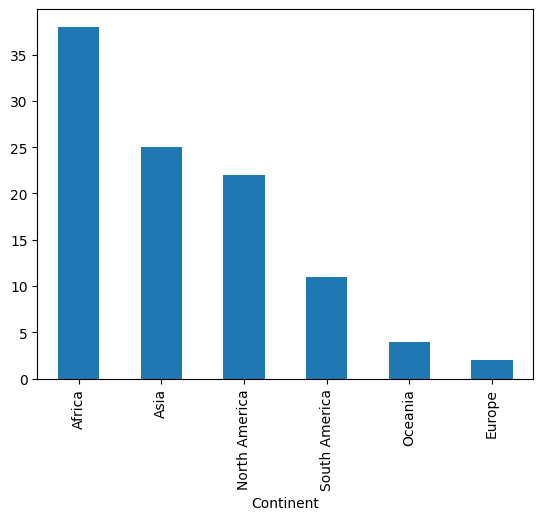

In [ ]:
df["Continent"].value_counts().plot(kind = "bar")

In [ ]:
df.describe()

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


## Distribution of the columns

<ipython-input-149-2d6a85c96a4e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production(Tons)"])
<ipython-input-149-2d6a85c96a4e>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production_per_Person(Kg)"])
<ipython-input-149-2d6a85c96a4e>:7: UserWarning: 

`distplot` is a deprecat

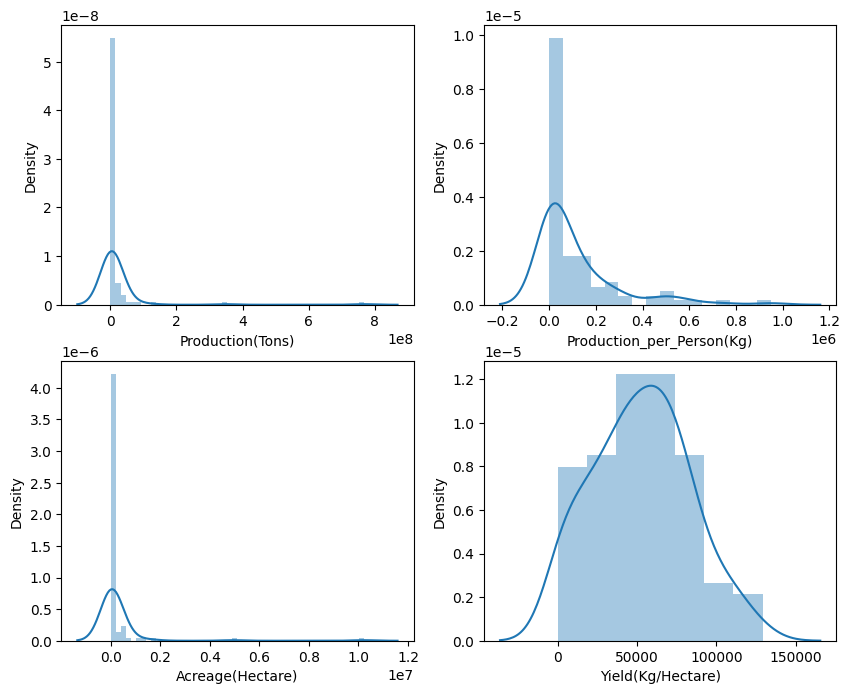

In [ ]:
plt.figure(figsize = (10,8))
plt.subplot(2,2,1)
sns.distplot(df["Production(Tons)"])
plt.subplot(2,2,2)
sns.distplot(df["Production_per_Person(Kg)"])
plt.subplot(2,2,3)
sns.distplot(df["Acreage(Hectare)"])
plt.subplot(2,2,4)
sns.distplot(df["Yield(Kg/Hectare)"])
plt.show()

<Axes: ylabel='Production(Tons)'>

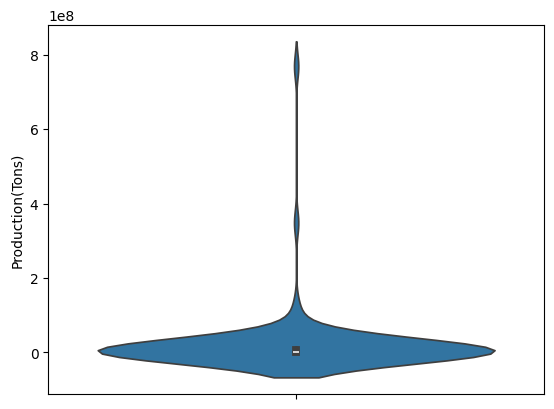

In [ ]:
sns.violinplot(df["Production(Tons)"])

## Checking outliers

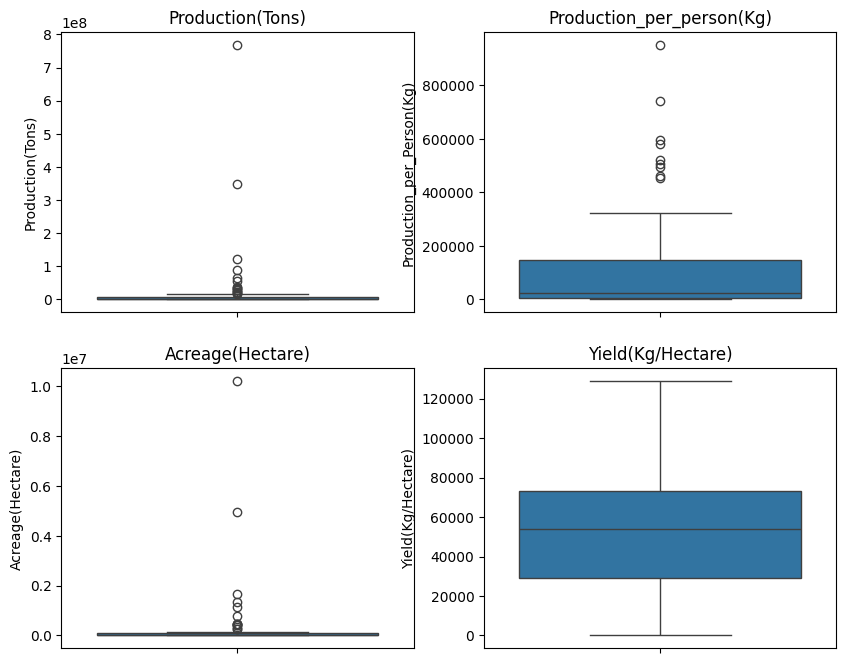

In [ ]:
plt.figure(figsize = (10,8))
plt.subplot(2,2,1)
sns.boxplot(df["Production(Tons)"])
plt.title("Production(Tons)")
plt.subplot(2,2,2)
sns.boxplot(df["Production_per_Person(Kg)"])
plt.title("Production_per_person(Kg)")
plt.subplot(2,2,3)
sns.boxplot(df["Acreage(Hectare)"])
plt.title("Acreage(Hectare)")
plt.subplot(2,2,4)
sns.boxplot(df["Yield(Kg/Hectare)"])
plt.title("Yield(Kg/Hectare)")
plt.show()

# **Bivariate Analysis**


In [ ]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


## Which country produces maximum sugarcane?

In [ ]:
df_new = df[["Country", "Production(Tons)"]].set_index("Country")

In [ ]:
df_new.head()

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0


In [ ]:
df_new["Production(Tons)_Percent"] = df_new["Production(Tons)"]/df_new["Production(Tons)"].sum()*100

In [ ]:
df_new.head()

,Production(Tons),Production(Tons)_Percent
Country,,
Brazil,768678382.0,40.727285
India,348448000.0,18.462001
China,123059739.0,6.520138
Thailand,87468496.0,4.634389
Pakistan,65450704.0,3.467809


<Axes: ylabel='Production(Tons)_Percent'>

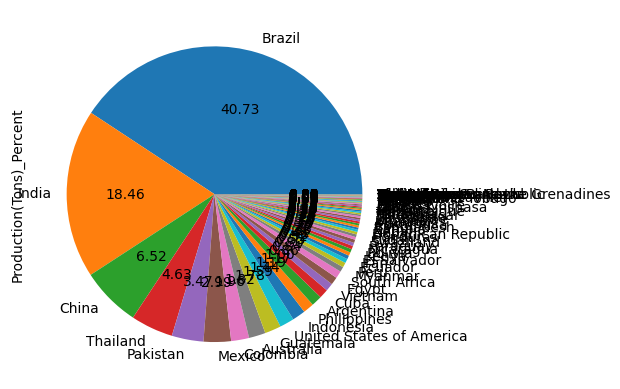

In [ ]:
df_new["Production(Tons)_Percent"].plot(kind = "pie", autopct = "%.2f")

<Axes: xlabel='Country'>

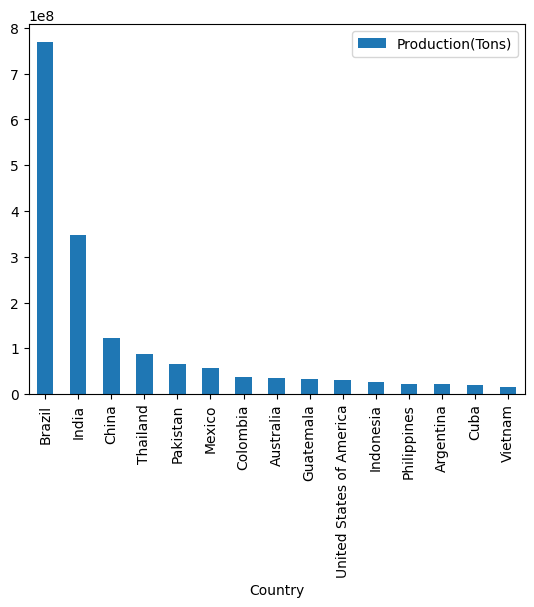

In [ ]:
df[["Country","Production(Tons)"]].set_index("Country").sort_values("Production(Tons)", ascending = False).head(15).plot(kind = "bar")

<ipython-input-168-97b0128d3838>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph2 = sns.barplot(data = df.head(15),  x= "Country", y = "Production(Tons)", palette = colors)
<ipython-input-168-97b0128d3838>:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  graph2.set_xticklabels(graph2.get_xticklabels(),rotation = 90)


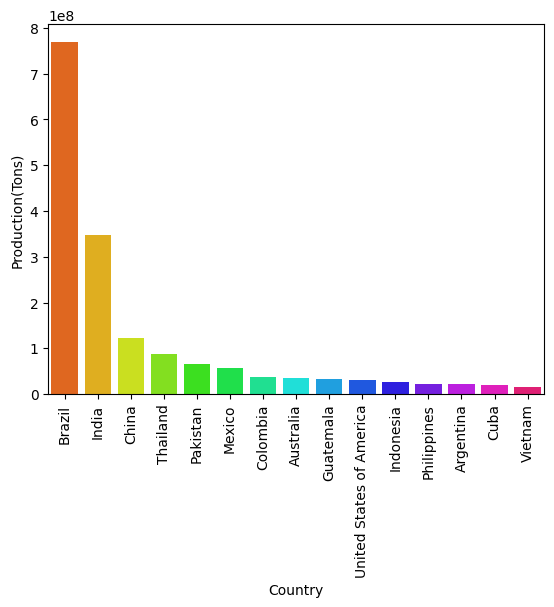

In [ ]:
colors = sns.color_palette("hsv", len(df.head(15)))
graph2 = sns.barplot(data = df.head(15),  x= "Country", y = "Production(Tons)", palette = colors)
graph2.set_xticklabels(graph2.get_xticklabels(),rotation = 90)
plt.show()

**Answer:** The country "Brazil" produces maximum sugarcane out of all countries.



## Which country has highest land?

<ipython-input-172-9750a837501a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph3 = sns.barplot(data = df_yield,  x= "Country", y = "Yield(Kg/Hectare)", palette = colors)
<ipython-input-172-9750a837501a>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  graph3.set_xticklabels(graph3.get_xticklabels(),rotation =90)


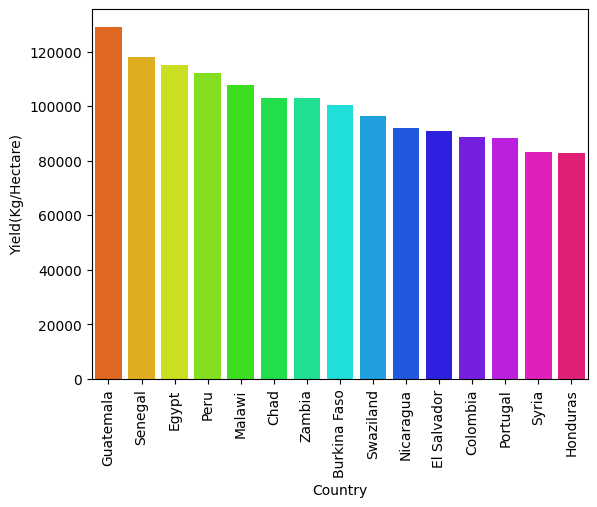

In [ ]:
df_yield = df.sort_values("Yield(Kg/Hectare)", ascending = False).head(15)
graph3 = sns.barplot(data = df_yield,  x= "Country", y = "Yield(Kg/Hectare)", palette = colors)
graph3.set_xticklabels(graph3.get_xticklabels(),rotation =90)
plt.show()

**Answer:** Guatemala has the highest yield(kg/hectare)

<ipython-input-166-780bcda26776>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph4 = sns.barplot(data = df_yield,  x= "Country", y = "Production_per_Person(Kg)", palette=colors)
<ipython-input-166-780bcda26776>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  graph4.set_xticklabels(graph4.get_xticklabels(),rotation =90)


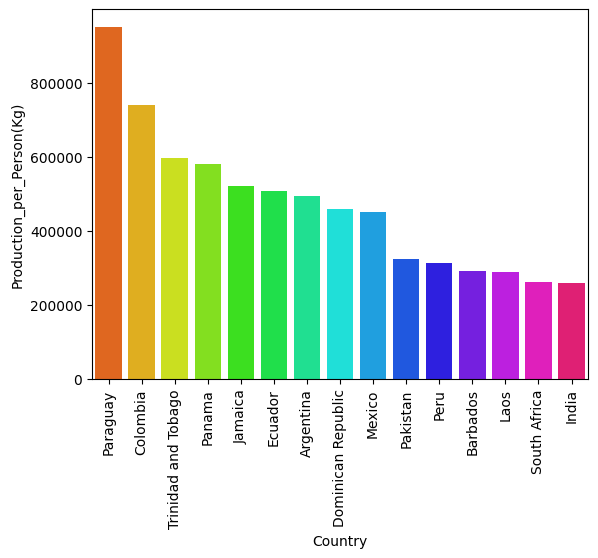

In [ ]:
df_yield = df.sort_values("Production_per_Person(Kg)", ascending = False).head(15)
graph4 = sns.barplot(data = df_yield,  x= "Country", y = "Production_per_Person(Kg)", palette=colors)
graph4.set_xticklabels(graph4.get_xticklabels(),rotation =90)
plt.show()

# **Correlation**

In [ ]:
df.corr(numeric_only=True)

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Production(Tons),1.000000,0.015000,0.997550,0.132812
Production_per_Person(Kg),0.015000,1.000000,0.012557,0.017999
Acreage(Hectare),0.997550,0.012557,1.000000,0.113433
Yield(Kg/Hectare),0.132812,0.017999,0.113433,1.000000


<Axes: >

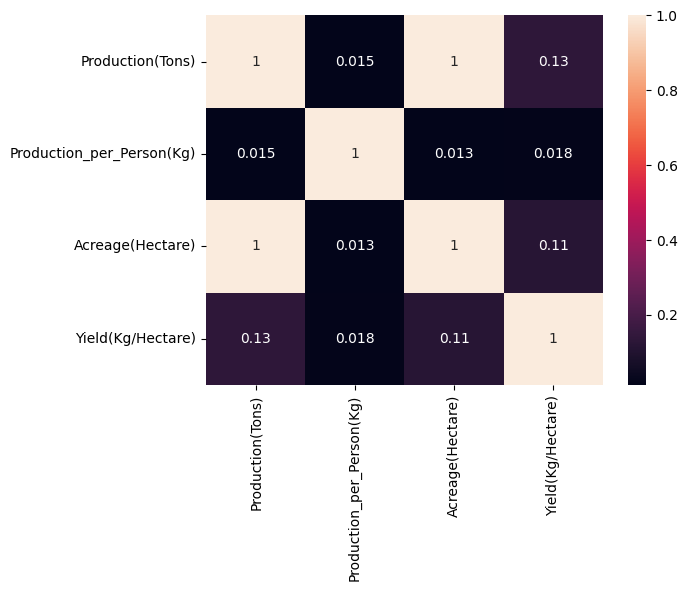

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=  True)

## Do countries with highest land produce more sugarcane?

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

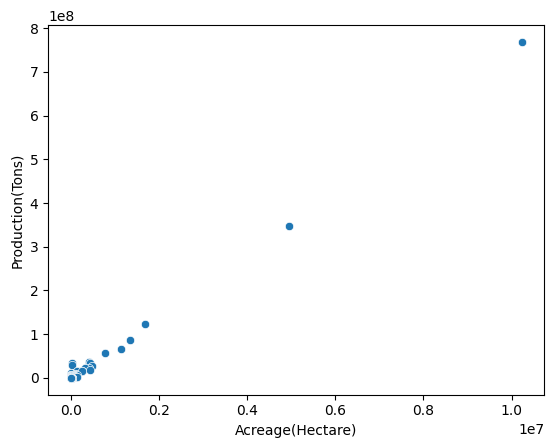

In [ ]:
sns.scatterplot(data = df, x = "Acreage(Hectare)", y = "Production(Tons)")

**Answer:** Overall increase in land increases the production.

## Do countries which yield more sugarcane per hectare produces more sugarcane in total?

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Production(Tons)'>

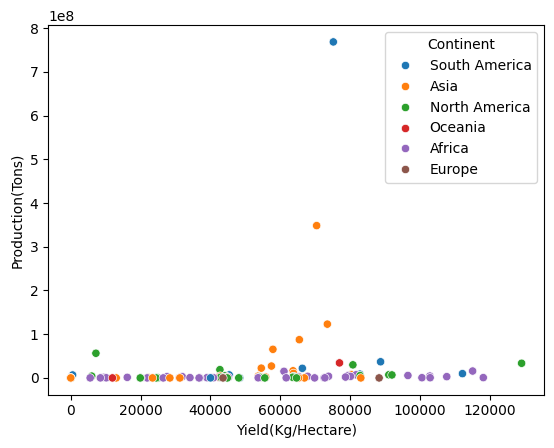

In [ ]:
sns.scatterplot(data = df, x = "Yield(Kg/Hectare)" , y = "Production(Tons)", hue = "Continent")

# **Analysis for Continent**

In [ ]:
df_continent = df.groupby("Continent").sum()

In [ ]:
df_continent["number_of_countries"] = df.groupby("Continent").count()["Country"]

In [ ]:
df_continent

,Country,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare),number_of_countries
Continent,,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5,38
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9,2
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1,4
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7,11


## Which continent produces maximum sugarcane?

<Axes: xlabel='Continent'>

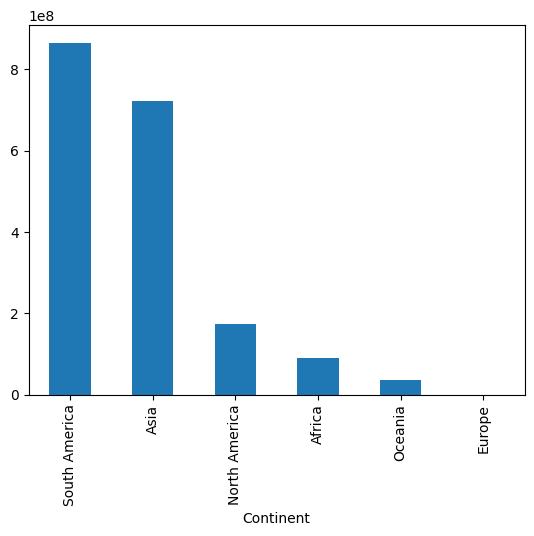

In [ ]:
df_continent["Production(Tons)"].sort_values(ascending =  False).plot(kind = "bar")

## Do number of countries in a Continent effects production of sugarcane?

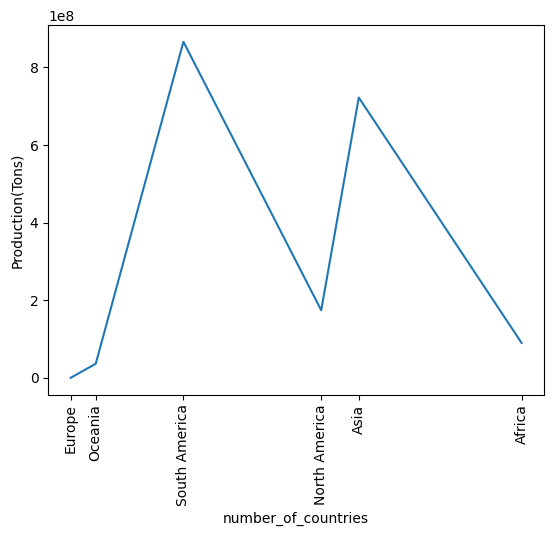

In [ ]:
continent_names = df_continent.index.to_list()
sns.lineplot(data = df_continent,x = "number_of_countries", y= "Production(Tons)" )
plt.xticks(df_continent["number_of_countries"], continent_names, rotation =90)
plt.show()

## Do continent with highest land produces more sugarcane?

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

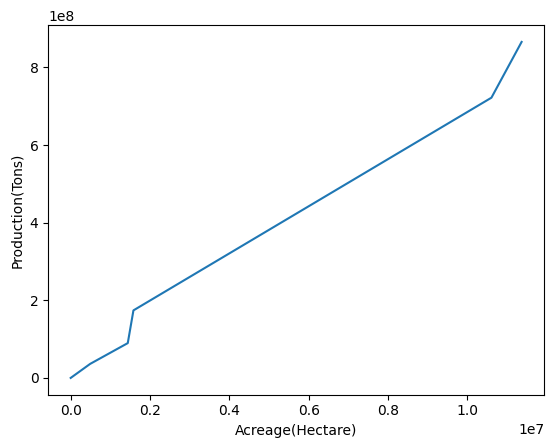

In [ ]:
sns.lineplot(data = df_continent,x = "Acreage(Hectare)", y= "Production(Tons)" )

## Production distribution by continent

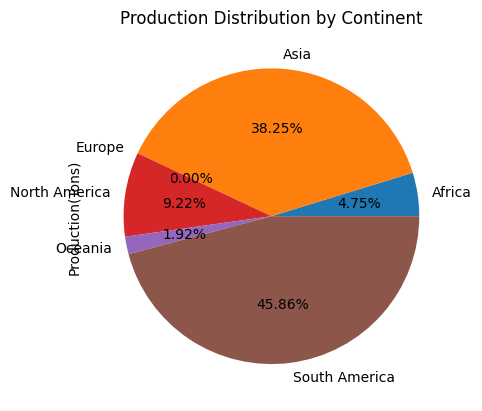

In [ ]:
df_continent["Production(Tons)"].plot(kind = "pie", autopct = "%.2f%%")
plt.title('Production Distribution by Continent')
plt.show()

## Correlation for continent

In [ ]:
df_continent.corr(numeric_only=True)

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare),number_of_countries
Production(Tons),1.000000,0.522211,0.994897,0.091201,0.109244
Production_per_Person(Kg),0.522211,1.000000,0.463215,0.542961,0.540086
Acreage(Hectare),0.994897,0.463215,1.000000,0.111166,0.132817
Yield(Kg/Hectare),0.091201,0.542961,0.111166,1.000000,0.989712
number_of_countries,0.109244,0.540086,0.132817,0.989712,1.000000
